In [49]:
import pandas as pd

data = pd.read_csv (r"/Users/silviaserafini/ironhack/PROGETTI/SharksData/OUTPUT/sharks_clean.csv",encoding='latin-1')
df = pd.DataFrame(data)
display(df.head())
print(df.shape)


,Unnamed: 0,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Fatal,NotFatal,Species,Season
0,17,2018.04.30.R,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,unknown,Minor injury to ankle,unknown,0,1,tiger,aut
1,14,2018.05.00,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,unknown,0,1,blacktip,spr
2,37,2018.03.09.b,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",15h30,0,1,unknown,spr
3,38,2018.03.09.a,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",07h30,0,1,wobbegong,spr
4,35,2018.03.31,2018,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,09h30,0,1,small,spr


(5627, 17)


# Creation of 5 year bins

In [50]:
df["fiveYears"] = pd.cut(df.Year, bins=[1979,1984,1989,1994,1999,2004,2009,2014,2019],
                         labels=['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015-2019'])



In [51]:

display(df.head())
df["fiveYears"].value_counts()

,Unnamed: 0,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Fatal,NotFatal,Species,Season,fiveYears
0,17,2018.04.30.R,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,unknown,Minor injury to ankle,unknown,0,1,tiger,aut,2015-2019
1,14,2018.05.00,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,unknown,0,1,blacktip,spr,2015-2019
2,37,2018.03.09.b,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",15h30,0,1,unknown,spr,2015-2019
3,38,2018.03.09.a,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",07h30,0,1,wobbegong,spr,2015-2019
4,35,2018.03.31,2018,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,09h30,0,1,small,spr,2015-2019


2010-2014    555
2005-2009    505
2000-2004    426
2015-2019    418
1995-1999    306
1990-1994    232
1985-1989    196
1980-1984    191
Name: fiveYears, dtype: int64

# Focus on Fatal vs not Fatal attacks  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


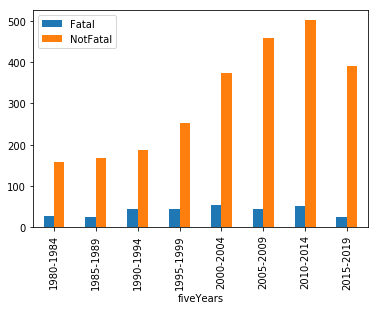

In [52]:
#cration of a temp database discarding 'unknown' values

#print(type(df.loc[(df["Fatal" ] != 'unknown')]))
temp=df[df["Fatal" ] != 'unknown']
temp["Fatal"]=pd.to_numeric(temp["Fatal"])
temp["NotFatal"]=pd.to_numeric(temp["NotFatal"])

#discard the old entries (early than 1970)
temp=temp[temp['Year'] > 1970]

#plot of the 'Fatal' and 'NotFatal' values group by 5 years bins
%matplotlib inline
temp.groupby("fiveYears").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar()



In [53]:
temp1=temp.groupby(["fiveYears"]).agg({"Fatal": "sum","NotFatal":"sum"})
temp1.describe()

,Fatal,NotFatal
count,8.000000,8.000000
mean,39.000000,311.125000
std,12.130246,137.208327
min,24.000000,157.000000
25%,25.750000,181.500000
50%,44.000000,313.000000
75%,46.000000,408.000000
max,53.000000,502.000000


# Take out 1

Take out: the highest number of reported Sharks attacks are in the bin 2010-2014,
with a maximum number of 53 Fatal and 502 not fatal attacks reported.

# Focus on type of attacks resulted in 'fatal' outcome

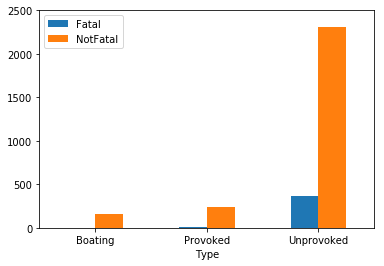

In [57]:

temp.groupby("Type").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar(rot=0, ylim=(0,2500))
#temp.head()

# Take out 2

Take Out: Sharks are Predator. Most of the "fatal" attacks are the result of "unprovocked" Sharcks attacks.

# Focus on the most dangerous species well represented in the data

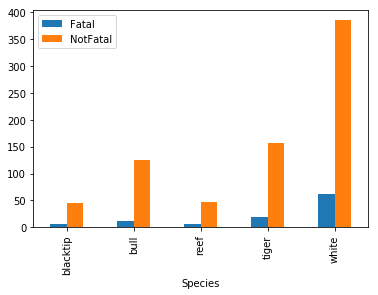

In [116]:
#I am considering only the top 5 most relevant species
top5s=temp['Species'].value_counts()[1:6].index
#temp2 is a temporal dataframe
temp2=temp[temp['Species'].isin(top5s)]
temp2.groupby("Species").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar()



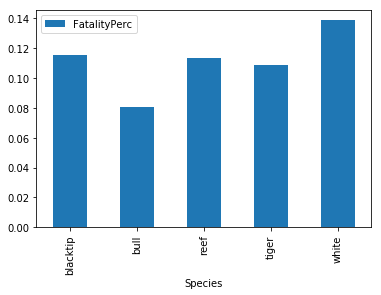

In [60]:
temp3=temp2.groupby('Species').agg({"Fatal": "sum","NotFatal": "sum"})
#calulation of the Fatality percentage
temp3['FatalityPerc']= temp3['Fatal'] / (temp3['Fatal'] + temp3['NotFatal'])
#plotting of the Fatality Percentage
temp3=temp3.reset_index().sort_values("FatalityPerc")

temp3.groupby('Species').agg({"FatalityPerc": "sum"}).plot.bar()

In [61]:
display(temp3.reset_index().sort_values('FatalityPerc',ascending=False))

,index,Species,Fatal,NotFatal,FatalityPerc
4,4,white,62,385,0.138702
3,0,blacktip,6,46,0.115385
2,2,reef,6,47,0.113208
1,3,tiger,19,156,0.108571
0,1,bull,11,125,0.080882


# Take out 3

 A white shark meeting represents the highest fatality probaility (~14%), followed by Blacktip and Reef shark.

# Focus on the most dangerous geagraphical areas and period of the year


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


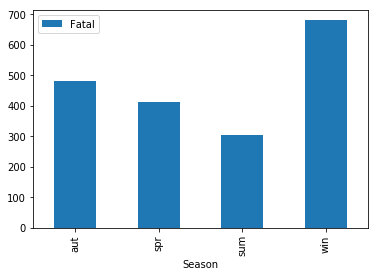

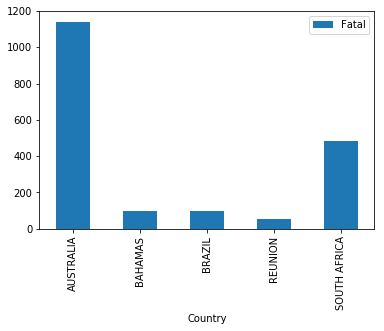

In [100]:
#filtering of the database keeping only the the top5 countries cases.
top5=temp['Country'].value_counts()[1:6].index

#creation of a filter to consider only the all-value-known entries of the top 5 countries
filter4=(df['Country'].isin(top5)) & (df["Season" ] != 'unk') & (df['Fatal'] !='unknown')& (df['NotFatal'] !='unknown')
temp4=df[filter4]

#plots
temp4.groupby("Season").agg({'Fatal': "count"}).plot.bar()
temp4.groupby("Country").agg({'Fatal': "count"}).plot.bar()



# Take out 4

Australia during the European winter season (Nov-Dec-Jan-Feb, summer season in Australia) is the most dangerous Country (Highest fatality probability as a result of a shark attack)

# Where and when should I go to have the highest possibility to meet a shark?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

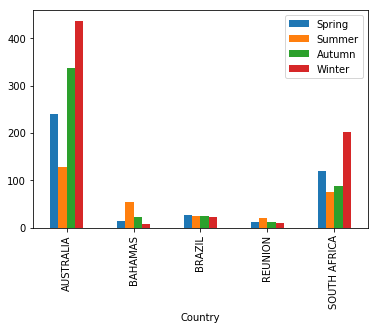

In [120]:

#Creation of 4 new column, one per season
temp4['Spring']=temp4['Season']=='spr'
temp4['Summer']=temp4['Season']=='sum'
temp4['Autumn']=temp4['Season']=='aut'
temp4['Winter']=temp4['Season']=='win'


#plots
temp4.groupby("Country").agg({'Spring': "sum",'Summer':'sum','Autumn':'sum','Winter':'sum'}).plot.bar()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

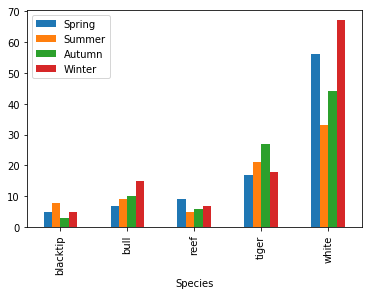

In [125]:

#creation of filter5 to consider only the top5 species of sharks.

filter5= filter4 & (df["Species"].isin(top5s))
temp5=df[filter5]

#creation of 4 columns: 1 per season
temp5['Spring']=temp5['Season']=='spr'
temp5['Summer']=temp5['Season']=='sum'
temp5['Autumn']=temp5['Season']=='aut'
temp5['Winter']=temp5['Season']=='win'

#plot
temp5.groupby("Species").agg({'Spring': "sum",'Summer':'sum','Autumn':'sum','Winter':'sum'}).plot.bar()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

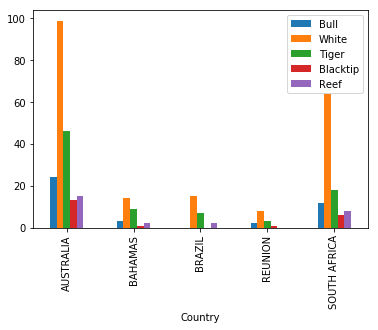

In [130]:
#creation of 5 columns: 1 per species
temp5['Blacktip']=temp5['Species']=='blacktip'
temp5['Bull']=temp5['Species']=='bull'
temp5['Reef']=temp5['Species']=='reef'
temp5['White']=temp5['Species']=='white'
temp5['Tiger']=temp5['Species']=='tiger'

#plot
temp5.groupby("Country").agg({'Bull': "sum",'White':'sum','Tiger':'sum','Blacktip':'sum','Reef':'sum'}).plot.bar()

# Take out 5

If you want to meet a shark you can go to:
    -Australia in Autumn or Winter;
    -South Africa in Winter or Spring; 
    -the Bahamas during summer 
    -Brazil, any time.

If you want to meet a White shark you can go:
    -Australia Autumn or Winter, or Shouth Africa in Spring or Winter (European seasons)

If you want to meet a Blacktip shark you can go:
    -Australia and South Africa in Summer
    
If you want to meet a Pull shark you can go:
    -Ausralia, South Africa, Winter or Autumn
    
If you want to meet a Reef shark you can go:

If you want to meet a Tiger shark you can go:


False    372
Name: Reef, dtype: int64